<font size=6 color='purple'>**Separation plots**</font>

*Notes:* Initialization cells must be run before plotting, since they define functions, colors, and snapshot numbers


In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gd
import matplotlib.cm as cm
from utils.paths import SetupPaths
from utils.get_summary_data import compile_summary
from utils.vectorCorrection import vectorCorrection as vector


paths = SetupPaths()

In [2]:
plt.show()
plt.rcParams.update({'font.size':20,"xtick.direction":"in","ytick.direction":"in"})


# Initialization

In [3]:
# defining equivalent redshifts
zs = {"z":np.array([0,1,2,3,4]), 
      "zill":np.array([135,85,68,60,56]), 
      "ztng":np.array([99,50,33,25,22])}

In [4]:
# defining color palette for plotting
cmap = cm.get_cmap('winter')
cmap2 = cm.get_cmap('spring')
palette = {"0":"#668AFF","1": "#7B55F3",
           "2":'#FFB201',"3":"#FF6300",
           "4":"#DE2280",
           "a":cmap(0.1),"b":cmap(0.3),"c":cmap(0.5),"d":cmap(0.7),"e":cmap(0.9),
           "a2":cmap2(0.1),"b2":cmap2(0.3),"c2":cmap2(0.5),"d2":cmap2(0.7),"e2":cmap2(0.9)}


In [5]:
# make functions to get data at the requested snapshot
def get_primmask(primstells, size):
    if size == "dwarf":
        mask = (primstells > 0.01) & (primstells < 0.5)
    elif size == "massive":
        mask = (primstells > 0.5) & (primstells < 10)
    return mask

def get_groupmask(groupmass, size):
    if size == "dwarf":
        mask = (groupmass > 8) & (groupmass < 50)
    elif size == "massive":
        mask = (groupmass > 100) & (groupmass < 650)
    return mask

class EmptyFile(Exception): pass
class SkipRedshift(Exception): pass


In [6]:
# def get_seps(sim, phys, size, sepmask="default", minn=10, maxx=1000, groupCut=False, median=False, errorprint=False, redshiftcutoff=True):    
#     if sim == "Illustris":
#         snapshots = np.arange(0,136,1)
#         snapshots = np.delete(snapshots, np.where(snapshots==113)[0])
#         redcutoff = 3.8
#     elif sim == "TNG":
#         snapshots = np.arange(0,100,1)
#         snapshots = np.delete(snapshots, np.where(snapshots==48)[0])
#         redcutoff = 4
        
#     redshifts = []  
#     med_pairs, med_major, med_minor = [], [], []
#     quart_pairs, quart_major, quart_minor = [], [], []
            
#     for snap in snapshots:  
#         try:
#             pair_path = f"{sim}_{snap}_100.hdf5"
#             pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
            
#             if np.size(pair_data) == 0:
#                 raise EmptyFile
                
#             redshift = pair_data['Header'].attrs['Redshift']
            
#             if redshiftcutoff & ( redshift > redcutoff) :
#                 raise SkipRedshift
                
#             if (len(pair_data['pairs'][phys]['Group ID']) == 0):    
#                 raise EmptyFile
                
                

#             # grabbing the relevant values
#             pairs = pair_data["pairs"][phys]

#             pri_stell = np.array(pairs["Sub1 Stellar Mass"])
#             sec_stell = np.array(pairs["Sub2 Stellar Mass"])
#             grouprads = np.array(pairs["Group Radius"])
#             seps = np.array(pairs["Separation"]) 
            
#             # masks            
#             paired_prims = get_primmask(pri_stell, size)
#             paired_group = get_groupmask(np.array(pairs["Group Mass"]), size)
#             paired_median = np.array( pairs['Realization'] )==-1
# #             paired_sepcut = get_sepmask(seps, key=sepmask, **{"min":minn,"max":maxx, "groupRadius":grouprads})

#             majors = (sec_stell/pri_stell > 1/4)
#             minors = (sec_stell/pri_stell > 1/10) & (sec_stell/pri_stell < 1/4)
      
#             paired_mask = paired_prims #& paired_sepcut
        
#             if groupCut:
#                 paired_mask = paired_mask & paired_group
        
#             if median:
#                 paired_mask = paired_mask & paired_median

#                 major_mask = paired_mask & majors
#                 minor_mask = paired_mask & minors
                                
#                 med_pairs_snap = np.median(seps[paired_mask])
#                 med_major_snap = np.median(seps[major_mask])
#                 med_minor_snap = np.median(seps[minor_mask])
#                 quart_pairs_snap = [0,0]
#                 quart_major_snap = [0,0]
#                 quart_minor_snap = [0,0]
                                                      
#             elif ~median: 
#                 paired_per_real = []
#                 major_per_real = []
#                 minor_per_real = []
                
#                 realizations = np.unique( np.array(pairs['Realization']) )
                
#                 for real in realizations:
#                     paired_real = np.array( pairs['Realization'] ) == real
                    
#                     paired_mask_real = paired_mask & paired_real
#                     major_mask_real = paired_mask_real & majors
#                     minor_mask_real = paired_mask_real & minors
                    
#                     if np.count_nonzero(paired_mask_real) == 0:
#                         pair_xx = 0
#                         major_xx = 0
#                         minor_xx = 0
                        
#                     else: 
#                         pair_xx = np.median(seps[paired_mask_real])
                        
#                         if np.count_nonzero(major_mask_real) == 0:
#                             major_xx = 0
#                         else:
#                             major_xx = np.median(seps[major_mask_real])
                            
#                         if np.count_nonzero(minor_mask_real) == 0:
#                             minor_xx = 0
#                         else:
#                             minor_xx = np.median(seps[minor_mask_real])
                        
#                     paired_per_real.append( pair_xx )
#                     major_per_real.append( major_xx )
#                     minor_per_real.append( minor_xx )

#                 med_pairs_snap = np.median(paired_per_real)
#                 med_major_snap = np.median(major_per_real)
#                 med_minor_snap = np.median(minor_per_real)
#                 quart_pairs_snap = np.percentile( paired_per_real,[16,84] ) 
#                 quart_major_snap = np.percentile( major_per_real,[16,84] ) 
#                 quart_minor_snap = np.percentile( minor_per_real,[16,84] ) 
                
#             redshifts.append( redshift )
#             med_pairs.append( med_pairs_snap )
#             med_major.append( med_major_snap )
#             med_minor.append( med_minor_snap )


#             quart_pairs.append( quart_pairs_snap )
#             quart_major.append( quart_major_snap )
#             quart_minor.append( quart_minor_snap )

#         except KeyError:
#             if errorprint: print(f'skipping {snap} for KeyError. Please debug')
#             continue
            
#         except EmptyFile:
#             if errorprint: print(f"skipping {snap}, empty file")
#             continue
            
#         except SkipRedshift:
#             if errorprint: print(f"skipping {snap}, redshift out of range")
                

                
#     sep_dictionary = {"z":np.array(redshifts),
#                         "All Median": np.array(med_pairs),
#                         "Major Median": np.array(med_major),
#                         "Minor Median":np.array(med_minor),
#                         "All Quarts":np.array(quart_pairs),
#                         "Major Quarts":np.array(quart_major),
#                         "Minor Quarts":np.array(quart_minor)}
    
#     return sep_dictionary



# sep dif vs. Rvir


In [6]:
def sep_diff(sim="Illustris",size="dwarf", z=0, median=False):
    separray = np.arange(20,350,10)
    lowmajor_diff = []
    highmajor_diff = []
    lowminor_diff = []
    highminor_diff = []
    for sep in separray:
        zloc = np.where( zs['z'] == z)[0]
        if sim == "Illustris":
            snap = zs['zill'][zloc][0]
        elif sim == "TNG":
            snap = zs['ztng'][zloc][0]   

        pair_path = f"{sim}_{snap}_10.hdf5"
        pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")

        sepdifs = {}
        lowmajor, highmajor, lowminor, highminor = [], [], [], []
        for phys in ["dark","hydro"]:

            # grabbing the relevant values
            pairs = pair_data["pairs"][phys]

            # dark first

            pri_stell = np.array(pairs["Sub1 Stellar Mass"])
            sec_stell = np.array(pairs["Sub2 Stellar Mass"])
            grouprads = np.array(pairs["Group Radius"])
            seps = np.array(pairs["Separation"]) 

            # masks            
            pair_prims = get_primmask(pri_stell, size)
            pair_gr = get_groupmask(np.array(pairs["Group Mass"]), size)
            pair_medreal = np.array( pairs['Realization'] ) == -1
            pair_lowsep = (seps > 10) & (seps < 10000)

            pair_sepcut_low = seps < sep
            pair_sepcut_high = seps > sep

            majors = (sec_stell/pri_stell > 1/4)
            minors = (sec_stell/pri_stell > 1/10) & (sec_stell/pri_stell < 1/4)

            pair_mask = pair_prims & pair_lowsep & pair_gr

            if median:
                pair_mask = pair_mask & pair_medreal

                major_mask = pair_mask & majors
                minor_mask = pair_mask & minors

                lowmajor.append( np.median( seps[major_mask & pair_sepcut_low] ) )
                highmajor.append( np.median( seps[major_mask & pair_sepcut_high] ) )

                lowminor.append( np.median( seps[minor_mask & pair_sepcut_low] ) )
                highminor.append( np.median( seps[minor_mask & pair_sepcut_high] ) )

            elif ~median: 
                lowmaj_real = []
                highmaj_real = []
                lowmin_real = []
                highmin_real = []

                realizations = np.unique( np.array(pairs['Realization']) )

                for real in realizations:
                    pair_real = np.array( pairs['Realization'] ) == real

                    pair_mask_real = pair_mask & pair_real
                    major_mask_real = pair_mask_real & majors
                    minor_mask_real = pair_mask_real & minors

                    lowmajmed = np.median( seps[major_mask_real & pair_sepcut_low] )
                    highmajmed = np.median( seps[major_mask_real & pair_sepcut_high] )
                    lowminmed = np.median( seps[minor_mask_real & pair_sepcut_low] )
                    highminmed = np.median( seps[minor_mask_real & pair_sepcut_high] )

                    lowmaj_real.append( lowmajmed )
                    highmaj_real.append( highmajmed )

                    lowmin_real.append( lowminmed )
                    highmin_real.append( highminmed )

                lowmajor.append( np.median( lowmaj_real ) )
                highmajor.append( np.median( highmaj_real ) )

                lowminor.append( np.median( lowmin_real ) )
                highminor.append( np.median( highmin_real ) )

        # difference between dark and hydro for a single x Rvir value 
        lowmajor_diff.append( np.diff(lowmajor)[0] )
        highmajor_diff.append( np.diff(highmajor)[0] )
        lowminor_diff.append( np.diff(lowminor)[0] )
        highminor_diff.append( np.diff(highminor)[0] ) 
        
    dictt = {'Sep Val':separray,
             "Low Major":np.array(lowmajor_diff),
             "High Major":np.array(highmajor_diff),
             "Low Minor":np.array(lowminor_diff),
             "High Minor":np.array(highminor_diff)}

    return dictt 

In [55]:
def rvir_diff(sim="Illustris",size="dwarf", z=0, median=False):
    XXarray = np.arange(0.1,3.1,0.1)
    lowmajor_diff = []
    highmajor_diff = []
    lowminor_diff = []
    highminor_diff = []
    for XX in XXarray:
        zloc = np.where( zs['z'] == z)[0]
        if sim == "Illustris":
            snap = zs['zill'][zloc][0]
        elif sim == "TNG":
            snap = zs['ztng'][zloc][0]   

        pair_path = f"{sim}_{snap}_10.hdf5"
        pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")

        sepdifs = {}
        lowmajor, highmajor, lowminor, highminor = [], [], [], []
        for phys in ["dark","hydro"]:
        #     phys = "dark"

            # grabbing the relevant values
            pairs = pair_data["pairs"][phys]

            # dark first

            pri_stell = np.array(pairs["Sub1 Stellar Mass"])
            sec_stell = np.array(pairs["Sub2 Stellar Mass"])
            grouprads = np.array(pairs["Group Radius"])
            seps = np.array(pairs["Separation"]) 

            # masks            
            pair_prims = get_primmask(pri_stell, size)
            pair_gr = get_groupmask(np.array(pairs["Group Mass"]), size)
            pair_medreal = np.array( pairs['Realization'] ) == -1
            pair_lowsep = (seps > 10) & (seps < 10000)

            pair_sepcut_low = seps < XX*grouprads
            pair_sepcut_high = seps > XX*grouprads

            majors = (sec_stell/pri_stell > 1/4)
            minors = (sec_stell/pri_stell > 1/10) & (sec_stell/pri_stell < 1/4)

            pair_mask = pair_prims & pair_lowsep & pair_gr

            if median:
                pair_mask = pair_mask & pair_medreal

                major_mask = pair_mask & majors
                minor_mask = pair_mask & minors

                lowmajor.append( np.median( seps[major_mask & pair_sepcut_low] ) )
                highmajor.append( np.median( seps[major_mask & pair_sepcut_high] ) )

                lowminor.append( np.median( seps[minor_mask & pair_sepcut_low] ) )
                highminor.append( np.median( seps[minor_mask & pair_sepcut_high] ) )

            elif ~median: 
                lowmaj_real = []
                highmaj_real = []
                lowmin_real = []
                highmin_real = []

                realizations = np.unique( np.array(pairs['Realization']) )

                for real in realizations:
                    pair_real = np.array( pairs['Realization'] ) == real

                    pair_mask_real = pair_mask & pair_real
                    major_mask_real = pair_mask_real & majors
                    minor_mask_real = pair_mask_real & minors

                    lowmajmed = np.median( seps[major_mask_real & pair_sepcut_low] )
                    highmajmed = np.median( seps[major_mask_real & pair_sepcut_high] )
                    lowminmed = np.median( seps[minor_mask_real & pair_sepcut_low] )
                    highminmed = np.median( seps[minor_mask_real & pair_sepcut_high] )

                    lowmaj_real.append( lowmajmed )
                    highmaj_real.append( highmajmed )

                    lowmin_real.append( lowminmed )
                    highmin_real.append( highminmed )

                lowmajor.append( np.median( lowmaj_real ) )
                highmajor.append( np.median( highmaj_real ) )

                lowminor.append( np.median( lowmin_real ) )
                highminor.append( np.median( highmin_real ) )

        # difference between dark and hydro for a single x Rvir value 
        lowmajor_diff.append( np.diff(lowmajor)[0] )
        highmajor_diff.append( np.diff(highmajor)[0] )
        lowminor_diff.append( np.diff(lowminor)[0] )
        highminor_diff.append( np.diff(highminor)[0] ) 
        
    dictt = {'XX Val':XXarray,
             "Low Major":np.array(lowmajor_diff),
             "High Major":np.array(highmajor_diff),
             "Low Minor":np.array(lowminor_diff),
             "High Minor":np.array(highminor_diff)}

    return dictt 

# Difference vs. Separation cut [kpc]

## Dwarfs

In [24]:
size = "dwarf"
median = False

ill0 = sep_diff("Illustris", size, 0, median=median)
ill1 = sep_diff("Illustris", size, 1, median=median)
ill2 = sep_diff("Illustris", size, 2, median=median)
ill3 = sep_diff("Illustris", size, 3, median=median)
ill4 = sep_diff("Illustris", size, 4, median=median)

tng0 = sep_diff("TNG", size, 0, median=median)
tng1 = sep_diff("TNG", size, 1, median=median)
tng2 = sep_diff("TNG", size, 2, median=median)
tng3 = sep_diff("TNG", size, 3, median=median)
tng4 = sep_diff("TNG", size, 4, median=median)


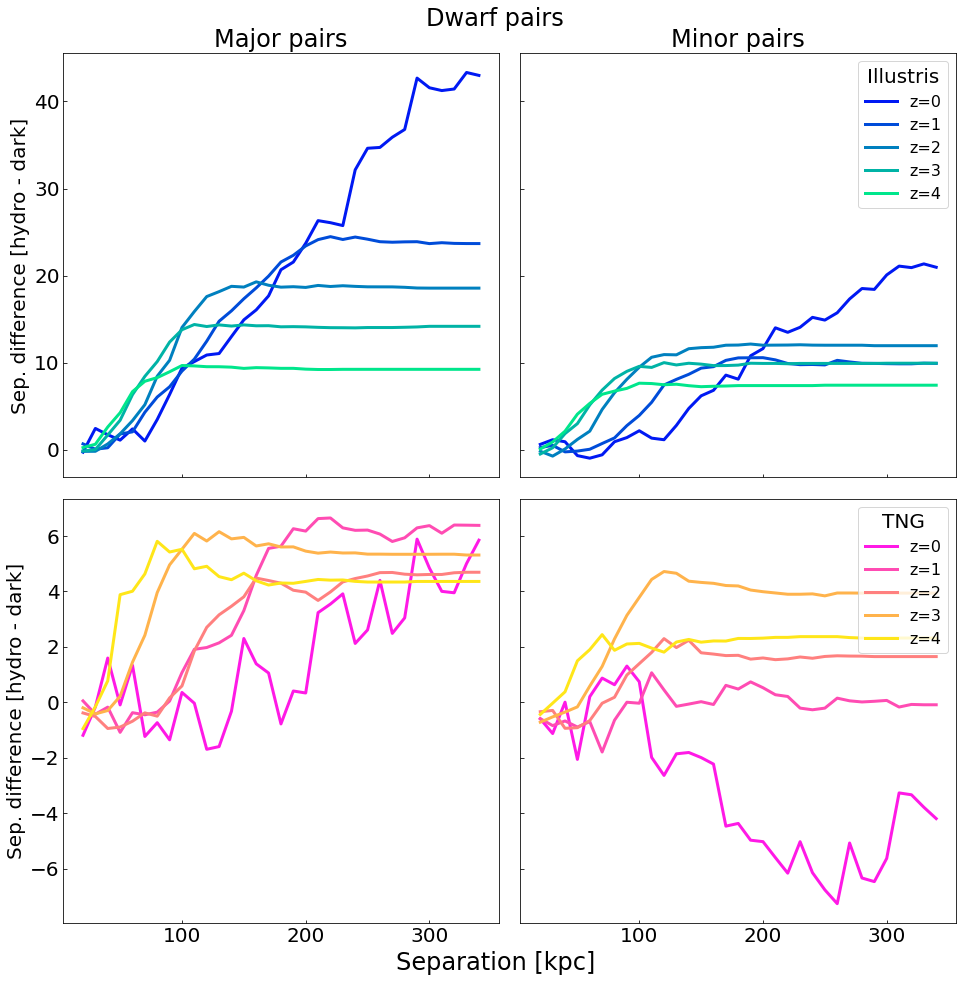

In [28]:
# dwarf pairs
high = False
low = True


## plot of median counts and differences for illustris and tng
fig, ax = plt.subplots(2, 2, figsize=(16,16), sharey='row', sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,1],'wspace': 0.05,"hspace":0.05})

illmaj = ax[0][0]
illmin = ax[0][1]
tngmaj = ax[1][0]
tngmin = ax[1][1]

illmaj.set(title="Major pairs", ylabel="Sep. difference [hydro - dark]")
illmin.set(title="Minor pairs")
tngmaj.set(ylabel="Sep. difference [hydro - dark]")

########################
# Illustris major #
########################
if high:
    illmaj.plot(ill0['Sep Val'],ill0['High Major'], color=palette["a"],linestyle="dotted", lw=3)
    illmaj.plot(ill1['Sep Val'],ill1['High Major'], color=palette["b"],linestyle="dotted", lw=3)
    illmaj.plot(ill2['Sep Val'],ill2['High Major'], color=palette["c"],linestyle="dotted", lw=3)
    illmaj.plot(ill3['Sep Val'],ill3['High Major'], color=palette["d"],linestyle="dotted", lw=3)
    illmaj.plot(ill4['Sep Val'],ill4['High Major'], color=palette["e"],linestyle="dotted", lw=3)
    
if low:
    illmaj.plot(ill0['Sep Val'],ill0['Low Major'], color=palette["a"], lw=3)
    illmaj.plot(ill1['Sep Val'],ill1['Low Major'], color=palette["b"], lw=3)
    illmaj.plot(ill2['Sep Val'],ill2['Low Major'], color=palette["c"], lw=3)
    illmaj.plot(ill3['Sep Val'],ill3['Low Major'], color=palette["d"], lw=3)
    illmaj.plot(ill4['Sep Val'],ill4['Low Major'], color=palette["e"], lw=3)

########################
# Illustris minor #
########################
if high:
    illmin.plot(ill0['Sep Val'],ill0['High Minor'], color=palette["a"],linestyle="dotted", lw=3)
    illmin.plot(ill1['Sep Val'],ill1['High Minor'], color=palette["b"],linestyle="dotted", lw=3)
    illmin.plot(ill2['Sep Val'],ill2['High Minor'], color=palette["c"],linestyle="dotted", lw=3)
    illmin.plot(ill3['Sep Val'],ill3['High Minor'], color=palette["d"],linestyle="dotted", lw=3)
    illmin.plot(ill4['Sep Val'],ill4['High Minor'], color=palette["e"],linestyle="dotted", lw=3)
    
if low:
    illmin.plot(ill0['Sep Val'],ill0['Low Minor'], color=palette["a"], lw=3, label='z=0')
    illmin.plot(ill1['Sep Val'],ill1['Low Minor'], color=palette["b"], lw=3, label='z=1')
    illmin.plot(ill2['Sep Val'],ill2['Low Minor'], color=palette["c"], lw=3, label='z=2')
    illmin.plot(ill3['Sep Val'],ill3['Low Minor'], color=palette["d"], lw=3, label='z=3')
    illmin.plot(ill4['Sep Val'],ill4['Low Minor'], color=palette["e"], lw=3, label='z=4')

########################
# TNG major #
########################
if high:
    tngmaj.plot(tng0['Sep Val'],tng0['High Major'], color=palette["a2"],linestyle="dotted", lw=3)
    tngmaj.plot(tng1['Sep Val'],tng1['High Major'], color=palette["b2"],linestyle="dotted", lw=3)
    tngmaj.plot(tng2['Sep Val'],tng2['High Major'], color=palette["c2"],linestyle="dotted", lw=3)
    tngmaj.plot(tng3['Sep Val'],tng3['High Major'], color=palette["d2"],linestyle="dotted", lw=3)
    tngmaj.plot(tng4['Sep Val'],tng4['High Major'], color=palette["e2"],linestyle="dotted", lw=3)
    
if low:
    tngmaj.plot(tng0['Sep Val'],tng0['Low Major'], color=palette["a2"], lw=3)
    tngmaj.plot(tng1['Sep Val'],tng1['Low Major'], color=palette["b2"], lw=3)
    tngmaj.plot(tng2['Sep Val'],tng2['Low Major'], color=palette["c2"], lw=3)
    tngmaj.plot(tng3['Sep Val'],tng3['Low Major'], color=palette["d2"], lw=3)
    tngmaj.plot(tng4['Sep Val'],tng4['Low Major'], color=palette["e2"], lw=3)

########################
# TNG minor #
########################
if high:
    tngmin.plot(tng0['Sep Val'],tng0['High Minor'], color=palette["a2"],linestyle="dotted", lw=3)
    tngmin.plot(tng1['Sep Val'],tng1['High Minor'], color=palette["b2"],linestyle="dotted", lw=3)
    tngmin.plot(tng2['Sep Val'],tng2['High Minor'], color=palette["c2"],linestyle="dotted", lw=3)
    tngmin.plot(tng3['Sep Val'],tng3['High Minor'], color=palette["d2"],linestyle="dotted", lw=3)
    tngmin.plot(tng4['Sep Val'],tng4['High Minor'], color=palette["e2"],linestyle="dotted", lw=3)
    
if low:
    tngmin.plot(tng0['Sep Val'],tng0['Low Minor'], color=palette["a2"], lw=3, label='z=0')
    tngmin.plot(tng1['Sep Val'],tng1['Low Minor'], color=palette["b2"], lw=3, label='z=1')
    tngmin.plot(tng2['Sep Val'],tng2['Low Minor'], color=palette["c2"], lw=3, label='z=2')
    tngmin.plot(tng3['Sep Val'],tng3['Low Minor'], color=palette["d2"], lw=3, label='z=3')
    tngmin.plot(tng4['Sep Val'],tng4['Low Minor'], color=palette["e2"], lw=3, label='z=4')

########################
# Final plotting tweaks #
########################
# xlims, ylims = ax[0][0].get_xlim(), ax[0][0].get_ylim()
# xwidth, ywidth = np.diff(xlims), np.diff(ylims)

# ax[0][0].text(xlims[0]+0.1*xwidth,ylims[1]-0.05*ywidth,"Illustris",va='top')
# ax[1][0].text(xlims[0]+0.05*xwidth,ylims[1]-0.05*ywidth,"TNG",va='top')


illmin.legend(title="Illustris",loc="upper right",fontsize=16)
tngmin.legend(title="TNG",loc="upper right",fontsize=16)
fig.supxlabel("Separation [kpc]",y=0.08)
fig.suptitle("Dwarf pairs",y=0.92)
# plt.savefig(f"../plots/counts/groupcut_m.png",bbox_inches='tight',facecolor="white")
plt.show()


## Massive

In [29]:
size = "massive"
median = False

ill0 = sep_diff("Illustris", size, 0, median=median)
ill1 = sep_diff("Illustris", size, 1, median=median)
ill2 = sep_diff("Illustris", size, 2, median=median)
ill3 = sep_diff("Illustris", size, 3, median=median)
ill4 = sep_diff("Illustris", size, 4, median=median)

tng0 = sep_diff("TNG", size, 0, median=median)
tng1 = sep_diff("TNG", size, 1, median=median)
tng2 = sep_diff("TNG", size, 2, median=median)
tng3 = sep_diff("TNG", size, 3, median=median)
tng4 = sep_diff("TNG", size, 4, median=median)

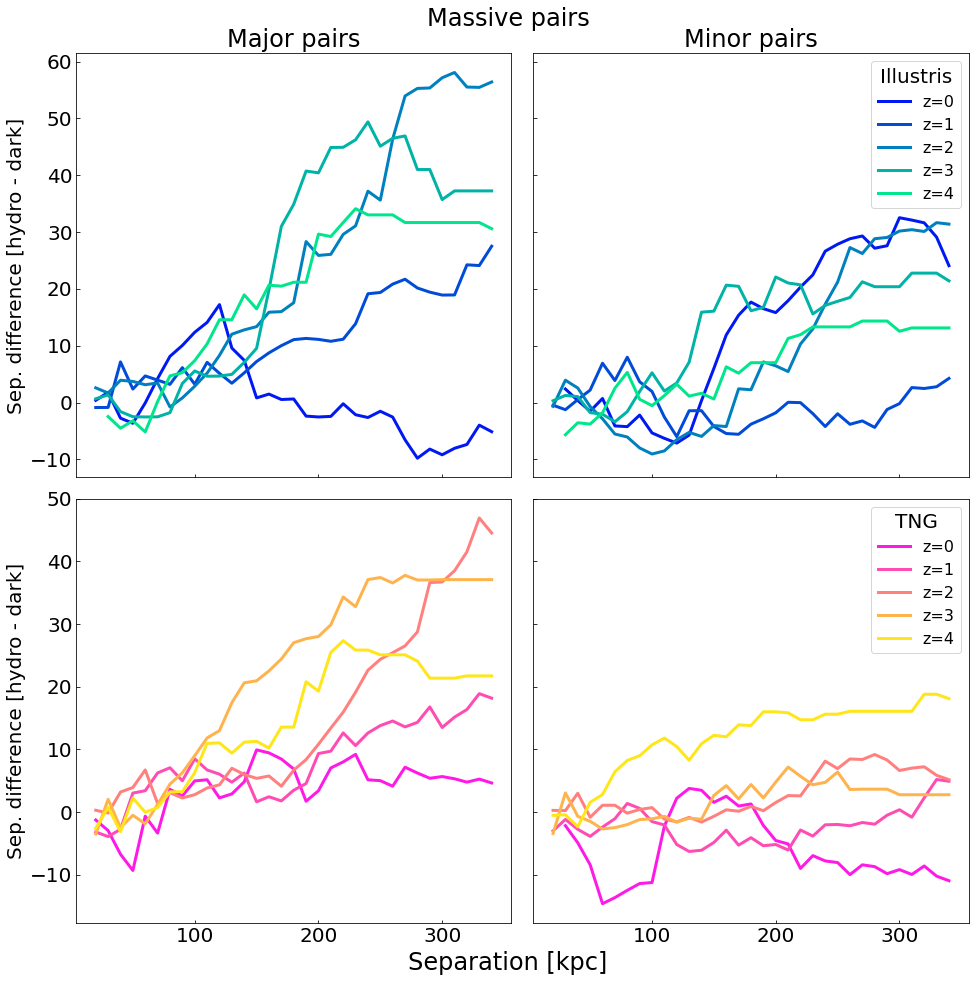

In [30]:
high = False
low = True


## plot of median counts and differences for illustris and tng
fig, ax = plt.subplots(2, 2, figsize=(16,16), sharey='row', sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,1],'wspace': 0.05,"hspace":0.05})

illmaj = ax[0][0]
illmin = ax[0][1]
tngmaj = ax[1][0]
tngmin = ax[1][1]

illmaj.set(title="Major pairs", ylabel="Sep. difference [hydro - dark]")
illmin.set(title="Minor pairs")
tngmaj.set(ylabel="Sep. difference [hydro - dark]")

########################
# Illustris major #
########################
if high:
    illmaj.plot(ill0['Sep Val'],ill0['High Major'], color=palette["a"],linestyle="dotted", lw=3)
    illmaj.plot(ill1['Sep Val'],ill1['High Major'], color=palette["b"],linestyle="dotted", lw=3)
    illmaj.plot(ill2['Sep Val'],ill2['High Major'], color=palette["c"],linestyle="dotted", lw=3)
    illmaj.plot(ill3['Sep Val'],ill3['High Major'], color=palette["d"],linestyle="dotted", lw=3)
    illmaj.plot(ill4['Sep Val'],ill4['High Major'], color=palette["e"],linestyle="dotted", lw=3)
    
if low:
    illmaj.plot(ill0['Sep Val'],ill0['Low Major'], color=palette["a"], lw=3)
    illmaj.plot(ill1['Sep Val'],ill1['Low Major'], color=palette["b"], lw=3)
    illmaj.plot(ill2['Sep Val'],ill2['Low Major'], color=palette["c"], lw=3)
    illmaj.plot(ill3['Sep Val'],ill3['Low Major'], color=palette["d"], lw=3)
    illmaj.plot(ill4['Sep Val'],ill4['Low Major'], color=palette["e"], lw=3)

########################
# Illustris minor #
########################
if high:
    illmin.plot(ill0['Sep Val'],ill0['High Minor'], color=palette["a"],linestyle="dotted", lw=3)
    illmin.plot(ill1['Sep Val'],ill1['High Minor'], color=palette["b"],linestyle="dotted", lw=3)
    illmin.plot(ill2['Sep Val'],ill2['High Minor'], color=palette["c"],linestyle="dotted", lw=3)
    illmin.plot(ill3['Sep Val'],ill3['High Minor'], color=palette["d"],linestyle="dotted", lw=3)
    illmin.plot(ill4['Sep Val'],ill4['High Minor'], color=palette["e"],linestyle="dotted", lw=3)
    
if low:
    illmin.plot(ill0['Sep Val'],ill0['Low Minor'], color=palette["a"], lw=3, label='z=0')
    illmin.plot(ill1['Sep Val'],ill1['Low Minor'], color=palette["b"], lw=3, label='z=1')
    illmin.plot(ill2['Sep Val'],ill2['Low Minor'], color=palette["c"], lw=3, label='z=2')
    illmin.plot(ill3['Sep Val'],ill3['Low Minor'], color=palette["d"], lw=3, label='z=3')
    illmin.plot(ill4['Sep Val'],ill4['Low Minor'], color=palette["e"], lw=3, label='z=4')

########################
# TNG major #
########################
if high:
    tngmaj.plot(tng0['Sep Val'],tng0['High Major'], color=palette["a2"],linestyle="dotted", lw=3)
    tngmaj.plot(tng1['Sep Val'],tng1['High Major'], color=palette["b2"],linestyle="dotted", lw=3)
    tngmaj.plot(tng2['Sep Val'],tng2['High Major'], color=palette["c2"],linestyle="dotted", lw=3)
    tngmaj.plot(tng3['Sep Val'],tng3['High Major'], color=palette["d2"],linestyle="dotted", lw=3)
    tngmaj.plot(tng4['Sep Val'],tng4['High Major'], color=palette["e2"],linestyle="dotted", lw=3)
    
if low:
    tngmaj.plot(tng0['Sep Val'],tng0['Low Major'], color=palette["a2"], lw=3)
    tngmaj.plot(tng1['Sep Val'],tng1['Low Major'], color=palette["b2"], lw=3)
    tngmaj.plot(tng2['Sep Val'],tng2['Low Major'], color=palette["c2"], lw=3)
    tngmaj.plot(tng3['Sep Val'],tng3['Low Major'], color=palette["d2"], lw=3)
    tngmaj.plot(tng4['Sep Val'],tng4['Low Major'], color=palette["e2"], lw=3)

########################
# TNG minor #
########################
if high:
    tngmin.plot(tng0['Sep Val'],tng0['High Minor'], color=palette["a2"],linestyle="dotted", lw=3)
    tngmin.plot(tng1['Sep Val'],tng1['High Minor'], color=palette["b2"],linestyle="dotted", lw=3)
    tngmin.plot(tng2['Sep Val'],tng2['High Minor'], color=palette["c2"],linestyle="dotted", lw=3)
    tngmin.plot(tng3['Sep Val'],tng3['High Minor'], color=palette["d2"],linestyle="dotted", lw=3)
    tngmin.plot(tng4['Sep Val'],tng4['High Minor'], color=palette["e2"],linestyle="dotted", lw=3)
    
if low:
    tngmin.plot(tng0['Sep Val'],tng0['Low Minor'], color=palette["a2"], lw=3, label='z=0')
    tngmin.plot(tng1['Sep Val'],tng1['Low Minor'], color=palette["b2"], lw=3, label='z=1')
    tngmin.plot(tng2['Sep Val'],tng2['Low Minor'], color=palette["c2"], lw=3, label='z=2')
    tngmin.plot(tng3['Sep Val'],tng3['Low Minor'], color=palette["d2"], lw=3, label='z=3')
    tngmin.plot(tng4['Sep Val'],tng4['Low Minor'], color=palette["e2"], lw=3, label='z=4')

########################
# Final plotting tweaks #
########################
# xlims, ylims = ax[0][0].get_xlim(), ax[0][0].get_ylim()
# xwidth, ywidth = np.diff(xlims), np.diff(ylims)

# ax[0][0].text(xlims[0]+0.1*xwidth,ylims[1]-0.05*ywidth,"Illustris",va='top')
# ax[1][0].text(xlims[0]+0.05*xwidth,ylims[1]-0.05*ywidth,"TNG",va='top')


illmin.legend(title="Illustris",loc="upper right",fontsize=16)
tngmin.legend(title="TNG",loc="upper right",fontsize=16)
fig.supxlabel("Separation [kpc]",y=0.08)
fig.suptitle("Massive pairs",y=0.92)
# plt.savefig(f"../plots/counts/groupcut_m.png",bbox_inches='tight',facecolor="white")
plt.show()


# Difference vs. % Rvir

## Dwarfs

In [56]:
size = "dwarf"
median = False

ill0 = rvir_diff("Illustris", size, 0, median=median)
ill1 = rvir_diff("Illustris", size, 1, median=median)
ill2 = rvir_diff("Illustris", size, 2, median=median)
ill3 = rvir_diff("Illustris", size, 3, median=median)
ill4 = rvir_diff("Illustris", size, 4, median=median)

tng0 = rvir_diff("TNG", size, 0, median=median)
tng1 = rvir_diff("TNG", size, 1, median=median)
tng2 = rvir_diff("TNG", size, 2, median=median)
tng3 = rvir_diff("TNG", size, 3, median=median)
tng4 = rvir_diff("TNG", size, 4, median=median)


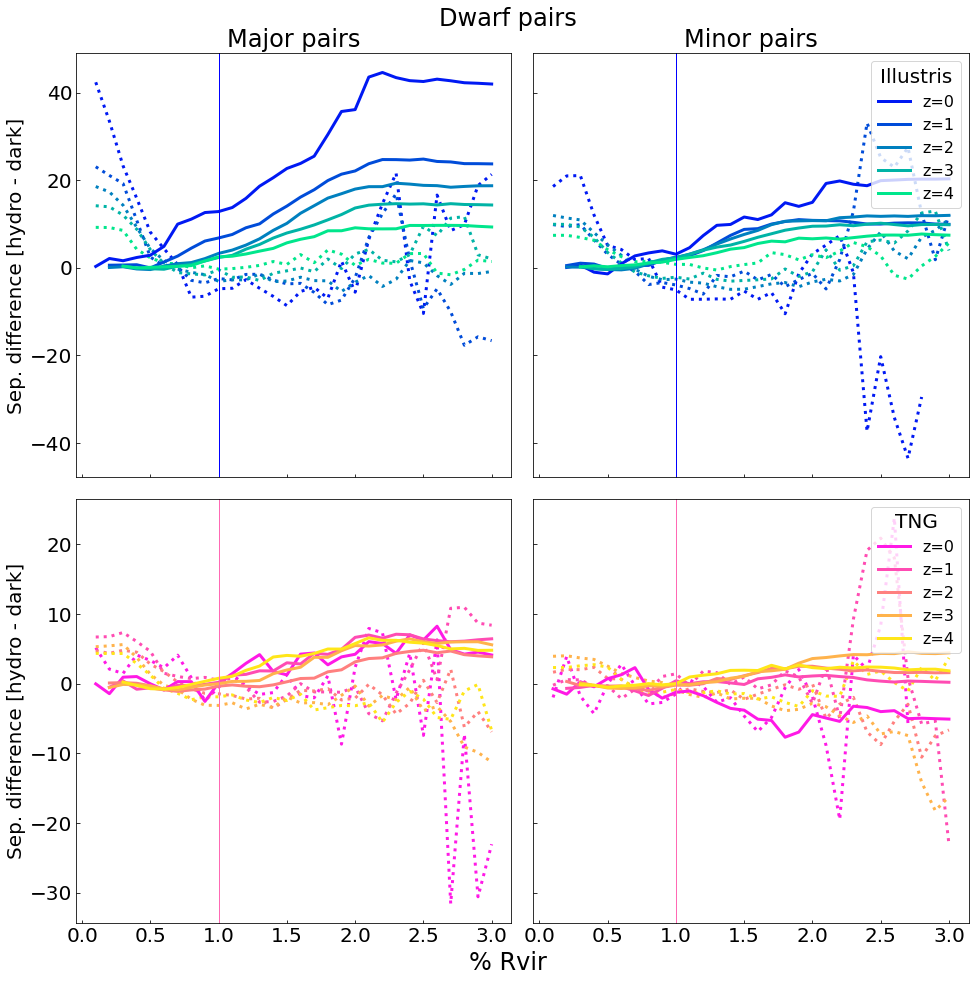

In [57]:
# dwarf pairs
high = True
low = True

## plot of median counts and differences for illustris and tng
fig, ax = plt.subplots(2, 2, figsize=(16,16), sharey='row', sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,1],'wspace': 0.05,"hspace":0.05})

illmaj = ax[0][0]
illmin = ax[0][1]
tngmaj = ax[1][0]
tngmin = ax[1][1]

illmaj.set(title="Major pairs", ylabel="Sep. difference [hydro - dark]")
illmin.set(title="Minor pairs")
tngmaj.set(ylabel="Sep. difference [hydro - dark]")

########################
# Illustris major #
########################
if high:
    illmaj.plot(ill0['XX Val'],ill0['High Major'], color=palette["a"],linestyle="dotted", lw=3)
    illmaj.plot(ill1['XX Val'],ill1['High Major'], color=palette["b"],linestyle="dotted", lw=3)
    illmaj.plot(ill2['XX Val'],ill2['High Major'], color=palette["c"],linestyle="dotted", lw=3)
    illmaj.plot(ill3['XX Val'],ill3['High Major'], color=palette["d"],linestyle="dotted", lw=3)
    illmaj.plot(ill4['XX Val'],ill4['High Major'], color=palette["e"],linestyle="dotted", lw=3)
    
if low:
    illmaj.plot(ill0['XX Val'],ill0['Low Major'], color=palette["a"], lw=3)
    illmaj.plot(ill1['XX Val'],ill1['Low Major'], color=palette["b"], lw=3)
    illmaj.plot(ill2['XX Val'],ill2['Low Major'], color=palette["c"], lw=3)
    illmaj.plot(ill3['XX Val'],ill3['Low Major'], color=palette["d"], lw=3)
    illmaj.plot(ill4['XX Val'],ill4['Low Major'], color=palette["e"], lw=3)

########################
# Illustris minor #
########################
if high:
    illmin.plot(ill0['XX Val'],ill0['High Minor'], color=palette["a"],linestyle="dotted", lw=3)
    illmin.plot(ill1['XX Val'],ill1['High Minor'], color=palette["b"],linestyle="dotted", lw=3)
    illmin.plot(ill2['XX Val'],ill2['High Minor'], color=palette["c"],linestyle="dotted", lw=3)
    illmin.plot(ill3['XX Val'],ill3['High Minor'], color=palette["d"],linestyle="dotted", lw=3)
    illmin.plot(ill4['XX Val'],ill4['High Minor'], color=palette["e"],linestyle="dotted", lw=3)
    
if low:
    illmin.plot(ill0['XX Val'],ill0['Low Minor'], color=palette["a"], lw=3, label='z=0')
    illmin.plot(ill1['XX Val'],ill1['Low Minor'], color=palette["b"], lw=3, label='z=1')
    illmin.plot(ill2['XX Val'],ill2['Low Minor'], color=palette["c"], lw=3, label='z=2')
    illmin.plot(ill3['XX Val'],ill3['Low Minor'], color=palette["d"], lw=3, label='z=3')
    illmin.plot(ill4['XX Val'],ill4['Low Minor'], color=palette["e"], lw=3, label='z=4')

########################
# TNG major #
########################
if high:
    tngmaj.plot(tng0['XX Val'],tng0['High Major'], color=palette["a2"],linestyle="dotted", lw=3)
    tngmaj.plot(tng1['XX Val'],tng1['High Major'], color=palette["b2"],linestyle="dotted", lw=3)
    tngmaj.plot(tng2['XX Val'],tng2['High Major'], color=palette["c2"],linestyle="dotted", lw=3)
    tngmaj.plot(tng3['XX Val'],tng3['High Major'], color=palette["d2"],linestyle="dotted", lw=3)
    tngmaj.plot(tng4['XX Val'],tng4['High Major'], color=palette["e2"],linestyle="dotted", lw=3)
    
if low:
    tngmaj.plot(tng0['XX Val'],tng0['Low Major'], color=palette["a2"], lw=3)
    tngmaj.plot(tng1['XX Val'],tng1['Low Major'], color=palette["b2"], lw=3)
    tngmaj.plot(tng2['XX Val'],tng2['Low Major'], color=palette["c2"], lw=3)
    tngmaj.plot(tng3['XX Val'],tng3['Low Major'], color=palette["d2"], lw=3)
    tngmaj.plot(tng4['XX Val'],tng4['Low Major'], color=palette["e2"], lw=3)

########################
# TNG minor #
########################
if high:
    tngmin.plot(tng0['XX Val'],tng0['High Minor'], color=palette["a2"],linestyle="dotted", lw=3)
    tngmin.plot(tng1['XX Val'],tng1['High Minor'], color=palette["b2"],linestyle="dotted", lw=3)
    tngmin.plot(tng2['XX Val'],tng2['High Minor'], color=palette["c2"],linestyle="dotted", lw=3)
    tngmin.plot(tng3['XX Val'],tng3['High Minor'], color=palette["d2"],linestyle="dotted", lw=3)
    tngmin.plot(tng4['XX Val'],tng4['High Minor'], color=palette["e2"],linestyle="dotted", lw=3)
    
if low:
    tngmin.plot(tng0['XX Val'],tng0['Low Minor'], color=palette["a2"], lw=3, label='z=0')
    tngmin.plot(tng1['XX Val'],tng1['Low Minor'], color=palette["b2"], lw=3, label='z=1')
    tngmin.plot(tng2['XX Val'],tng2['Low Minor'], color=palette["c2"], lw=3, label='z=2')
    tngmin.plot(tng3['XX Val'],tng3['Low Minor'], color=palette["d2"], lw=3, label='z=3')
    tngmin.plot(tng4['XX Val'],tng4['Low Minor'], color=palette["e2"], lw=3, label='z=4')

########################
# Final plotting tweaks #
########################
# xlims, ylims = ax[0][0].get_xlim(), ax[0][0].get_ylim()
# xwidth, ywidth = np.diff(xlims), np.diff(ylims)

# ax[0][0].text(xlims[0]+0.1*xwidth,ylims[1]-0.05*ywidth,"Illustris",va='top')
# ax[1][0].text(xlims[0]+0.05*xwidth,ylims[1]-0.05*ywidth,"TNG",va='top')

for axis,axis2 in zip(ax[0],ax[1]):
    axis.axvline(1,color='blue',lw=1)
    axis2.axvline(1,color='hotpink',lw=1)


illmin.legend(title="Illustris",loc="upper right",fontsize=16)
tngmin.legend(title="TNG",loc="upper right",fontsize=16)
fig.supxlabel("% Rvir",y=0.08)
fig.suptitle("Dwarf pairs",y=0.92)
# plt.savefig(f"../plots/counts/groupcut_m.png",bbox_inches='tight',facecolor="white")
plt.show()


## Massive

In [58]:
size = "massive"
median = False

ill0 = rvir_diff("Illustris", size, 0, median=median)
ill1 = rvir_diff("Illustris", size, 1, median=median)
ill2 = rvir_diff("Illustris", size, 2, median=median)
ill3 = rvir_diff("Illustris", size, 3, median=median)
ill4 = rvir_diff("Illustris", size, 4, median=median)

tng0 = rvir_diff("TNG", size, 0, median=median)
tng1 = rvir_diff("TNG", size, 1, median=median)
tng2 = rvir_diff("TNG", size, 2, median=median)
tng3 = rvir_diff("TNG", size, 3, median=median)
tng4 = rvir_diff("TNG", size, 4, median=median)


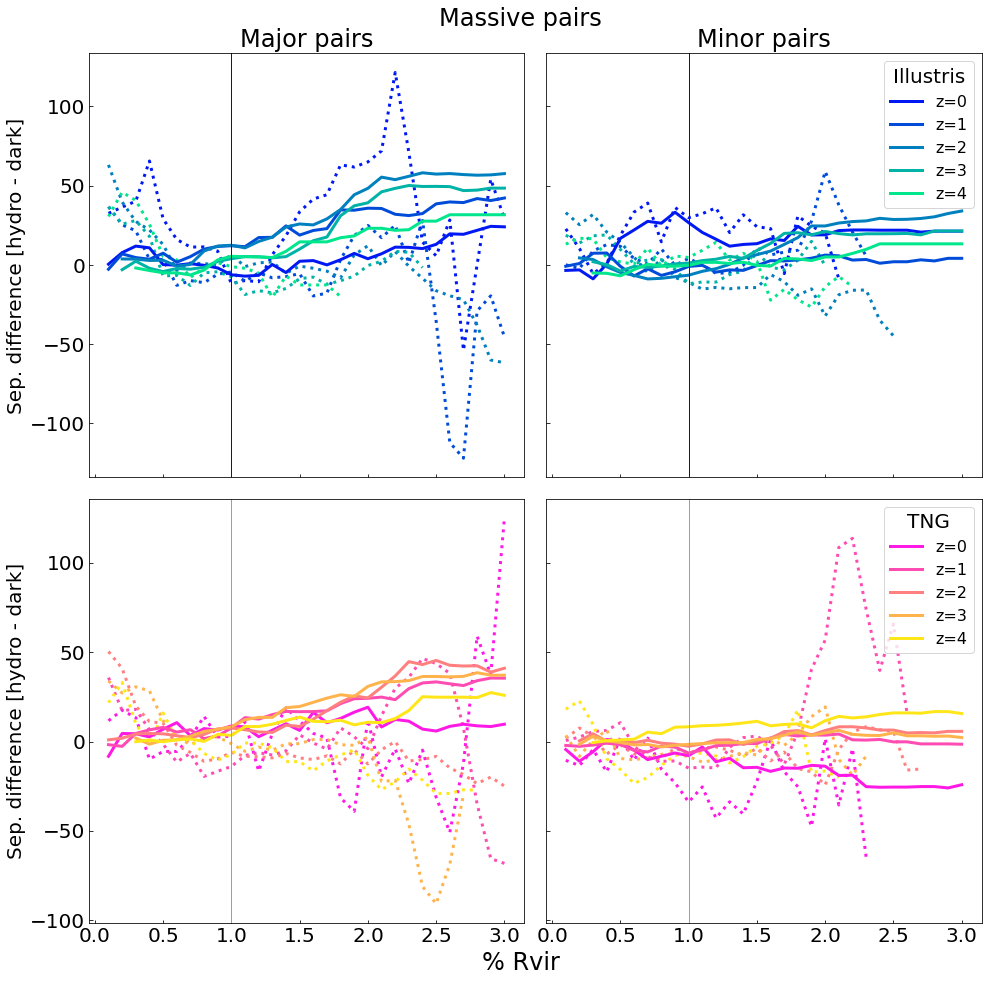

In [59]:
# massive pairs
high = True
low = True

## plot of median counts and differences for illustris and tng
fig, ax = plt.subplots(2, 2, figsize=(16,16), sharey='row', sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,1],'wspace': 0.05,"hspace":0.05})

illmaj = ax[0][0]
illmin = ax[0][1]
tngmaj = ax[1][0]
tngmin = ax[1][1]

illmaj.set(title="Major pairs", ylabel="Sep. difference [hydro - dark]")
illmin.set(title="Minor pairs")
tngmaj.set(ylabel="Sep. difference [hydro - dark]")

########################
# Illustris major #
########################
if high:
    illmaj.plot(ill0['XX Val'],ill0['High Major'], color=palette["a"],linestyle="dotted", lw=3)
    illmaj.plot(ill1['XX Val'],ill1['High Major'], color=palette["b"],linestyle="dotted", lw=3)
    illmaj.plot(ill2['XX Val'],ill2['High Major'], color=palette["c"],linestyle="dotted", lw=3)
    illmaj.plot(ill3['XX Val'],ill3['High Major'], color=palette["d"],linestyle="dotted", lw=3)
    illmaj.plot(ill4['XX Val'],ill4['High Major'], color=palette["e"],linestyle="dotted", lw=3)
    
if low:
    illmaj.plot(ill0['XX Val'],ill0['Low Major'], color=palette["a"], lw=3)
    illmaj.plot(ill1['XX Val'],ill1['Low Major'], color=palette["b"], lw=3)
    illmaj.plot(ill2['XX Val'],ill2['Low Major'], color=palette["c"], lw=3)
    illmaj.plot(ill3['XX Val'],ill3['Low Major'], color=palette["d"], lw=3)
    illmaj.plot(ill4['XX Val'],ill4['Low Major'], color=palette["e"], lw=3)

########################
# Illustris minor #
########################
if high:
    illmin.plot(ill0['XX Val'],ill0['High Minor'], color=palette["a"],linestyle="dotted", lw=3)
    illmin.plot(ill1['XX Val'],ill1['High Minor'], color=palette["b"],linestyle="dotted", lw=3)
    illmin.plot(ill2['XX Val'],ill2['High Minor'], color=palette["c"],linestyle="dotted", lw=3)
    illmin.plot(ill3['XX Val'],ill3['High Minor'], color=palette["d"],linestyle="dotted", lw=3)
    illmin.plot(ill4['XX Val'],ill4['High Minor'], color=palette["e"],linestyle="dotted", lw=3)
    
if low:
    illmin.plot(ill0['XX Val'],ill0['Low Minor'], color=palette["a"], lw=3, label='z=0')
    illmin.plot(ill1['XX Val'],ill1['Low Minor'], color=palette["b"], lw=3, label='z=1')
    illmin.plot(ill2['XX Val'],ill2['Low Minor'], color=palette["c"], lw=3, label='z=2')
    illmin.plot(ill3['XX Val'],ill3['Low Minor'], color=palette["d"], lw=3, label='z=3')
    illmin.plot(ill4['XX Val'],ill4['Low Minor'], color=palette["e"], lw=3, label='z=4')

########################
# TNG major #
########################
if high:
    tngmaj.plot(tng0['XX Val'],tng0['High Major'], color=palette["a2"],linestyle="dotted", lw=3)
    tngmaj.plot(tng1['XX Val'],tng1['High Major'], color=palette["b2"],linestyle="dotted", lw=3)
    tngmaj.plot(tng2['XX Val'],tng2['High Major'], color=palette["c2"],linestyle="dotted", lw=3)
    tngmaj.plot(tng3['XX Val'],tng3['High Major'], color=palette["d2"],linestyle="dotted", lw=3)
    tngmaj.plot(tng4['XX Val'],tng4['High Major'], color=palette["e2"],linestyle="dotted", lw=3)
    
if low:
    tngmaj.plot(tng0['XX Val'],tng0['Low Major'], color=palette["a2"], lw=3)
    tngmaj.plot(tng1['XX Val'],tng1['Low Major'], color=palette["b2"], lw=3)
    tngmaj.plot(tng2['XX Val'],tng2['Low Major'], color=palette["c2"], lw=3)
    tngmaj.plot(tng3['XX Val'],tng3['Low Major'], color=palette["d2"], lw=3)
    tngmaj.plot(tng4['XX Val'],tng4['Low Major'], color=palette["e2"], lw=3)

########################
# TNG minor #
########################
if high:
    tngmin.plot(tng0['XX Val'],tng0['High Minor'], color=palette["a2"],linestyle="dotted", lw=3)
    tngmin.plot(tng1['XX Val'],tng1['High Minor'], color=palette["b2"],linestyle="dotted", lw=3)
    tngmin.plot(tng2['XX Val'],tng2['High Minor'], color=palette["c2"],linestyle="dotted", lw=3)
    tngmin.plot(tng3['XX Val'],tng3['High Minor'], color=palette["d2"],linestyle="dotted", lw=3)
    tngmin.plot(tng4['XX Val'],tng4['High Minor'], color=palette["e2"],linestyle="dotted", lw=3)
    
if low:
    tngmin.plot(tng0['XX Val'],tng0['Low Minor'], color=palette["a2"], lw=3, label='z=0')
    tngmin.plot(tng1['XX Val'],tng1['Low Minor'], color=palette["b2"], lw=3, label='z=1')
    tngmin.plot(tng2['XX Val'],tng2['Low Minor'], color=palette["c2"], lw=3, label='z=2')
    tngmin.plot(tng3['XX Val'],tng3['Low Minor'], color=palette["d2"], lw=3, label='z=3')
    tngmin.plot(tng4['XX Val'],tng4['Low Minor'], color=palette["e2"], lw=3, label='z=4')

########################
# Final plotting tweaks #
########################
# xlims, ylims = ax[0][0].get_xlim(), ax[0][0].get_ylim()
# xwidth, ywidth = np.diff(xlims), np.diff(ylims)

# ax[0][0].text(xlims[0]+0.1*xwidth,ylims[1]-0.05*ywidth,"Illustris",va='top')
# ax[1][0].text(xlims[0]+0.05*xwidth,ylims[1]-0.05*ywidth,"TNG",va='top')

for axis,axis2 in zip(ax[0],ax[1]):
    axis.axvline(1,color='blue',lw=1)
    axis2.axvline(1,color='hotpink',lw=1)


illmin.legend(title="Illustris",loc="upper right",fontsize=16)
tngmin.legend(title="TNG",loc="upper right",fontsize=16)
fig.supxlabel("% Rvir",y=0.08)
fig.suptitle("Massive pairs",y=0.92)
# plt.savefig(f"../plots/counts/groupcut_m.png",bbox_inches='tight',facecolor="white")
plt.show()


# Trash

In [12]:
ill1

{'Sep Val': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
        150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270,
        280, 290, 300, 310, 320, 330, 340]),
 'Low Major': array([ 0.68810617,  0.07708144,  0.24257847,  1.82050261,  2.07001445,
         4.31905861,  6.06578831,  7.24124648,  9.04379067, 10.41709426,
        12.4752802 , 14.76666663, 15.95948478, 17.3449896 , 18.59202226,
        19.94604698, 21.56371607, 22.33372597, 23.40852596, 24.13383117,
        24.47410036, 24.14945927, 24.42896672, 24.18480128, 23.8944034 ,
        23.83588641, 23.877857  , 23.89505014, 23.67576291, 23.78023197,
        23.70214728, 23.68282158, 23.68100016]),
 'High Major': array([ 19.823462  ,  13.73914268,   5.59759164,   0.34194486,
         -1.71865981,  -1.73367271,  -4.21956352,  -3.74293707,
         -2.91590501,  -1.86021956,  -3.42150023,   0.07328741,
         -3.56298233,  -6.3490726 ,  -7.05546262,  -3.56747939,
         -0.24335866,   5.86

In [162]:
sim="Illustris"
size="dwarf"
z=1
median=True

# separray = np.arange(20,350,10)
sepp = 350
lowmajor_diff = []
highmajor_diff = []
lowminor_diff = []
highminor_diff = []


zloc = np.where( zs['z'] == z)[0]
if sim == "Illustris":
    snap = zs['zill'][zloc][0]
elif sim == "TNG":
    snap = zs['ztng'][zloc][0]   

pair_path = f"{sim}_{snap}_10.hdf5"
pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")

sepdifs = {}
lowmajor, highmajor, lowminor, highminor = [], [], [], []
for phys in ["dark","hydro"]:

    # grabbing the relevant values
    pairs = pair_data["pairs"][phys]

    # dark first

    pri_stell = np.array(pairs["Sub1 Stellar Mass"])
    sec_stell = np.array(pairs["Sub2 Stellar Mass"])
    grouprads = np.array(pairs["Group Radius"])
    seps = np.array(pairs["Separation"]) 

    # masks            
    pair_prims = get_primmask(pri_stell, size)
    pair_gr = get_groupmask(np.array(pairs["Group Mass"]), size)
    pair_medreal = np.array( pairs['Realization'] ) == -1
    pair_lowsep = (seps > 10) & (seps<10000)

    pair_sepcut_low = seps < sepp
    pair_sepcut_high = seps > sepp

    majors = (sec_stell/pri_stell > 1/4)
    minors = (sec_stell/pri_stell > 1/10) & (sec_stell/pri_stell < 1/4)

    pair_mask = pair_prims & pair_lowsep & pair_gr

    if median:
        pair_mask = pair_mask & pair_medreal

        major_mask = pair_mask & majors
        minor_mask = pair_mask & minors

        lowmajor.append( np.median( seps[major_mask & pair_sepcut_low] ) )
        highmajor.append( np.median( seps[major_mask & pair_sepcut_high] ) )

        lowminor.append( np.median( seps[minor_mask & pair_sepcut_low] ) )
        highminor.append( np.median( seps[minor_mask & pair_sepcut_high] ) )

    elif ~median: 
        lowmaj_real = []
        highmaj_real = []
        lowmin_real = []
        highmin_real = []

        realizations = np.unique( np.array(pairs['Realization']) )

        for real in realizations:
            pair_real = np.array( pairs['Realization'] ) == real

            pair_mask_real = pair_mask & pair_real
            major_mask_real = pair_mask_real & majors
            minor_mask_real = pair_mask_real & minors

            lowmajmed = np.median( seps[major_mask_real & pair_sepcut_low] )
            highmajmed = np.median( seps[major_mask_real & pair_sepcut_high] )
            lowminmed = np.median( seps[minor_mask_real & pair_sepcut_low] )
            highminmed = np.median( seps[minor_mask_real & pair_sepcut_high] )

            lowmaj_real.append( lowmajmed )
            highmaj_real.append( highmajmed )

            lowmin_real.append( lowminmed )
            highmin_real.append( highminmed )

        lowmajor.append( np.median( lowmaj_real ) )
        highmajor.append( np.median( highmaj_real ) )

        lowminor.append( np.median( lowmin_real ) )
        highminor.append( np.median( highmin_real ) )

# difference between dark and hydro for a single x Rvir value 
lowmajor_diff.append( np.diff(lowmajor)[0] )
highmajor_diff.append( np.diff(highmajor)[0] )
lowminor_diff.append( np.diff(lowminor)[0] )
highminor_diff.append( np.diff(highminor)[0] ) 



In [163]:
pair_data.keys()

<KeysViewHDF5 ['Header', 'pairs', 'unpaired']>

In [164]:
for i in pairs.keys():
    print(i,np.array(pairs[i])[test])

Group ID [1366 1472 3157 5383]
Group Mass [39.76287625 29.919646   34.26253525 12.69781319]
Group Nsubs [18 30  8  6]
Group Radius [115.474913   105.02845007 109.8810244   78.92902636]
Realization [-1 -1 -1 -1]
RelVel [370.32550281  57.47777882  88.51975349 406.06978729]
Separation [  361.60687149   384.01464663 53206.8693627  53175.40286351]
Stellar Mass Ratio [0.53602037 0.78933775 0.30734568 0.88628076]
Sub1 BHMass [5.12639417e-04 9.05138636e-05 1.23906809e-04 2.58220428e-05]
Sub1 BHMdot [4.41367387e-09 6.62687353e-06 3.00702254e-07 2.32452362e-06]
Sub1 GasMetallicity [0.00622774 0.00702939 0.00521406 0.00365891]
Sub1 ID [249536 254873 311875 354853]
Sub1 Mass [27.80016715 24.08515865 34.06523845 10.37539135]
Sub1 MassType [[4.97707962e+00 2.22295767e+01 0.00000000e+00 0.00000000e+00
  5.92998991e-01 5.12639417e-04]
 [3.91593948e+00 1.98021409e+01 0.00000000e+00 0.00000000e+00
  3.66936099e-01 1.41921450e-04]
 [5.52720509e+00 2.82580853e+01 0.00000000e+00 0.00000000e+00
  2.79795611

In [151]:
test = major_mask & pair_sepcut_high

In [150]:
np.where( (major_mask & pair_sepcut_high) == True)

(array([14208, 15480, 35592, 61428]),)

In [138]:
highmaj_real

[384.0146466309936,
 53171.148596579835,
 53186.07800849403,
 53172.68044854417,
 53169.958033580326,
 403.1598060226898,
 407.4791548747597,
 53196.20837786372,
 53203.72592376261,
 381.42182658404124,
 53156.05304497715,
 26761.13154291131]